In [1]:
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv('Training/2024_raw.csv')
df2023=pd.read_csv('Training/2023_raw.csv',index_col=0)

In [21]:
df2023.head()

,승차권 종류,승ㆍ하차 구분,BUSINESS_DAY,STATION_NO,TOTAL_CNT,CNT01,CNT02,CNT03,CNT04,CNT05,...,CNT16,CNT17,CNT18,CNT19,CNT20,CNT21,CNT22,CNT23,CNT00,TX_STATUS
,,,,,,,,,,,,,,,,,,,,,
1,보통권(일반),승차,20230101,1101,17,0,0,0,0,0,...,1,2,3,1,0,0,0,0,0,0
2,보통권(일반),하차,20230101,1101,18,0,0,0,0,0,...,4,0,3,0,0,0,0,2,0,1
3,보통권(어린이),승차,20230101,1101,15,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
4,보통권(어린이),하차,20230101,1101,21,0,0,0,0,0,...,3,1,2,1,2,0,0,0,0,1
5,프리패스승차권,승차,20230101,1101,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df.columns

Index(['승차권 종류', '승ㆍ하차 구분', 'BUSINESS_DAY', 'STATION_NO', 'TOTAL_CNT', 'CNT01',
       'CNT02', 'CNT03', 'CNT04', 'CNT05', 'CNT06', 'CNT07', 'CNT08', 'CNT09',
       'CNT10', 'CNT11', 'CNT12', 'CNT13', 'CNT14', 'CNT15', 'CNT16', 'CNT17',
       'CNT18', 'CNT19', 'CNT20', 'CNT21', 'CNT22', 'CNT23', 'CNT00'],
      dtype='object')

In [5]:
df = df.rename(columns={'승ㆍ하차 구분':'on-off'})
df['on-off'] = df['on-off'].replace({'승차':'on','하차':'off'})

In [6]:
df['BUSINESS_DAY'] = pd.to_datetime(df['BUSINESS_DAY'], format='%Y%m%d')
df['Days_Past'] = (df['BUSINESS_DAY'] - pd.Timestamp('2024-01-01')).dt.days
df['BUSINESS_DAY'] = df['Days_Past']
df.drop('Days_Past', axis=1, inplace=True)

In [7]:
df.tail()

,승차권 종류,on-off,BUSINESS_DAY,STATION_NO,TOTAL_CNT,CNT01,CNT02,CNT03,CNT04,CNT05,...,CNT15,CNT16,CNT17,CNT18,CNT19,CNT20,CNT21,CNT22,CNT23,CNT00
358894,우대(경로),on,273,1122,250,0,0,0,0,4,...,17,17,16,10,1,10,4,1,1,0
358895,우대(경로),off,273,1122,278,0,0,0,0,0,...,37,30,15,18,16,14,7,5,3,0
358896,우대(장애인),on,273,1122,49,0,0,0,0,1,...,4,4,1,4,2,1,0,3,1,0
358897,우대(장애인),off,273,1122,55,0,0,0,0,1,...,7,4,3,10,5,4,3,1,2,0
358898,우대(국가유공자),off,273,1122,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 대전역 일별 패턴 분석

In [8]:
# Filter rows where STATION_NO is 1104
filtered_df = df[df["STATION_NO"] == 1104]
# Perform grouping and summation
result = (
    filtered_df
    .groupby(['BUSINESS_DAY', 'STATION_NO', 'on-off'])
    .sum()
    .reset_index()  # Optional: to restore grouped columns as part of the DataFrame
)

# If you want to drop 'STATION_NO' after grouping:
result = result.drop(['STATION_NO','승차권 종류'], axis=1)

In [9]:
result

,BUSINESS_DAY,on-off,TOTAL_CNT,CNT01,CNT02,CNT03,CNT04,CNT05,CNT06,CNT07,...,CNT15,CNT16,CNT17,CNT18,CNT19,CNT20,CNT21,CNT22,CNT23,CNT00
0,0,off,6143,0,0,0,5,54,228,219,...,460,478,435,368,332,275,190,87,36,1
1,0,on,9967,0,0,0,5,16,129,103,...,927,903,852,739,748,908,706,640,327,0
2,1,off,8797,0,0,0,6,156,454,649,...,569,576,458,579,308,222,172,90,42,2
3,1,on,10365,0,0,0,6,33,136,755,...,820,725,826,876,533,411,354,273,114,0
4,2,off,8911,0,0,0,0,80,302,619,...,595,611,543,648,307,252,169,100,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,271,on,19363,0,0,0,0,26,155,325,...,1965,1890,1523,1151,1138,867,971,584,397,2
544,272,off,12040,0,0,0,0,109,299,340,...,1079,877,852,728,606,440,264,190,30,3
545,272,on,13985,0,0,0,0,22,123,217,...,1295,1318,1139,931,977,907,959,732,302,1
546,273,off,11148,0,0,0,0,192,572,854,...,774,757,803,961,437,341,231,116,50,5


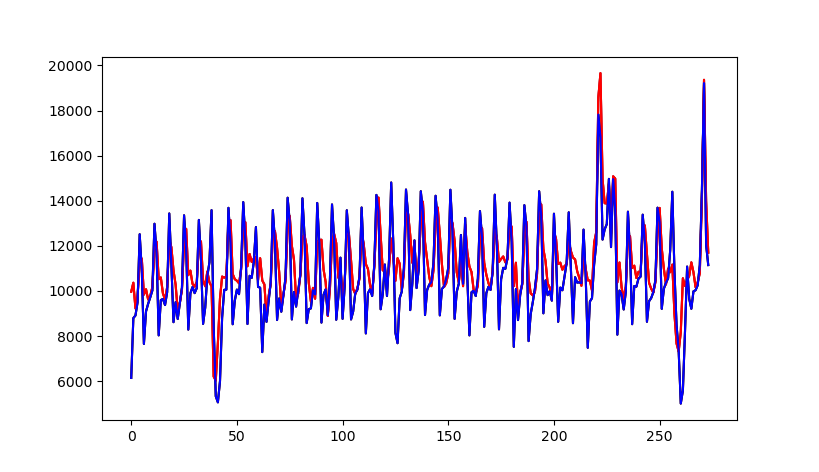

In [12]:
# df[df['on-off']=='on'].plot(x='BUSINESS_DAY',y='TOTAL_CNT')
# df[df['on-off']=='off'].plot(x='BUSINESS_DAY',y='TOTAL_CNT')
plt.plot(result[result['on-off']=='on']['BUSINESS_DAY'],result[result['on-off']=='on']['TOTAL_CNT'],c='red')
plt.plot(result[result['on-off']=='off']['BUSINESS_DAY'],result[result['on-off']=='off']['TOTAL_CNT'],c='blue')
plt.show()

In [61]:
# result[result['TOTAL_CNT']<6000]
result['TOTAL_CNT']

0       6143
1       9967
2       8797
3      10365
4       8911
       ...  
543    19363
544    12040
545    13985
546    11148
547    11699
Name: TOTAL_CNT, Length: 548, dtype: int64

# 역별 요일별 시간대별 평균

In [14]:
df['WEEKDAY'] = df['BUSINESS_DAY']%7
# Perform grouping and summation
result = (
    df
    .groupby(['승차권 종류'])
    .sum()
    # .groupby(['WEEKDAY', 'STATION_NO', 'on-off'])
    # .mean()
    .reset_index()  # Optional: to restore grouped columns as part of the DataFrame
)
result
# If you want to drop 'STATION_NO' after grouping:
# result = result.drop(['BUSINESS_DAY',], axis=1)

,승차권 종류,on-off,BUSINESS_DAY,STATION_NO,TOTAL_CNT,CNT01,CNT02,CNT03,CNT04,CNT05,...,CNT16,CNT17,CNT18,CNT19,CNT20,CNT21,CNT22,CNT23,CNT00,WEEKDAY
0,교통복지카드_선불_우대(경로),onoffonoffonoffoffonoffonoffonoffonoffonoffono...,1566737,12727830,57900,0,0,0,0,969,...,4884,4144,3279,2088,1789,1676,478,225,13,33954
1,교통복지카드_선불_우대(국가유공자),offonoffoffononoffononoffonononoffonoffoffonof...,438428,3598130,4216,0,0,0,0,11,...,180,244,564,320,109,74,64,93,7,8985
2,교통복지카드_선불_우대(기타),onoffonoffoffonoffonoffononoffoffonoffonoffono...,1172368,9551555,18570,0,0,0,0,281,...,987,1519,2767,623,586,745,257,296,15,23332
3,교통복지카드_선불_우대(장애인),onoffonoffonoffonoffoffonoffonoffononoffonoffo...,5527990,44743103,121808,3,0,0,5,1449,...,9288,9037,9728,4959,4122,3445,2082,871,127,117200
4,교통복지카드_후불_우대(경로),onoffonoffonoffonoffonoffonoffonoffonoffonoffo...,1645644,13400244,8083900,8,0,0,690,169307,...,656362,516539,348827,218039,162824,114807,52264,19239,1455,36036
5,교통복지카드_후불_우대(국가유공자),onoffonoffonoffonoffonoffonoffonoffonoffonoffo...,1583544,12893939,89907,1,0,0,2,1288,...,6259,7866,7072,2988,2787,2055,1163,564,38,34381
6,교통복지카드_후불_우대(기타),onoffonoffonoffonoffonoffonoffonoffonoffonoffo...,1645644,13400244,2145259,39,1,0,7,12969,...,109050,172279,323899,115213,74595,71812,51935,26099,2534,36036
7,교통복지카드_후불_우대(장애인),ononoffonoffonoffonoffonoffonoffonoffonoffonon...,7043705,57045643,712924,5,0,0,70,12485,...,53481,53595,59889,27689,20595,18739,10765,4357,385,151652
8,교통카드_선불_어린이,onoffonoffonoffononoffoffonoffonoffonoffonoffo...,4088452,33304786,317042,11,0,0,2,109,...,37571,36737,29121,20475,14558,11026,5932,1796,497,91501
9,교통카드_선불_일반,onoffonoffonoffononoffonoffoffonoffonoffonoffo...,6120184,50259682,7584126,237,0,0,209,57863,...,476478,627644,941406,443002,355658,345788,274352,156102,14077,133623
